<a href="https://colab.research.google.com/github/vivek22-11/CODSOFT/blob/main/CodSoft_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**:-Vivek Vilas Kadam

**Batch**:-May

**Domain**:-Datascience

**Title**:-IRIS FLOWER CLASSIFICATION

**TASK 3**

IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# ML Models
from sklearn.model_selection import train_test_split #Imports the train_test_split function from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from tabulate import tabulate
#Import evaluation metrics for assessing model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,  recall_score, f1_score

# Import Warnings to manage or ignore warning messages in the code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IRIS.csv",encoding='latin1')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').T)

data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 750

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 150 rows and 5 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

--------------------------------------------------   The last 5 rows of data    ---------------------------------------------

In [ ]:
class_counts = df['species'].value_counts()
print("Class counts of", class_counts)
#print()

Class counts of species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
df['species']=df['species'].str.replace('Iris-','')
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**Data Preprocessing: Check for missing values**

In [ ]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values/len(df))*100
check_null = pd.DataFrame({'missing_values': missing_values,'percentage_missing': percentage_missing})
print(check_null)

if missing_values.any():
    print("Dataset has null values.")
    print("Columns with null values:")
    print(missing_values[missing_values > 0])
else:
    print("\nDataset has no null values.")

              missing_values  percentage_missing
sepal_length               0                 0.0
sepal_width                0                 0.0
petal_length               0                 0.0
petal_width                0                 0.0
species                    0                 0.0

Dataset has no null values.


**Data Preprocessing: Check for duplicates**

In [ ]:
duplicates = df.duplicated().sum()
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:", duplicates)
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")

Duplicates found in the dataset: 3
     sepal_length  sepal_width  petal_length  petal_width    species
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
142           5.8          2.7           5.1          1.9  virginica


**Data Preprocessing: Detecting the outliers**

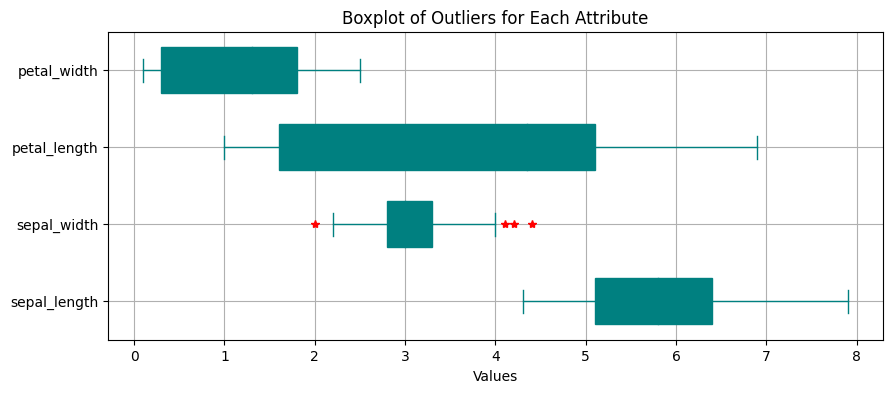

In [ ]:
# Create a boxplot for each attribute excluding the target variable
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot of Outliers for Each Attribute')
plt.xlabel('Values')
plt.show()

**Insights**: From the above boxplots, we can clearly see that the outliers are detected in the sepal width. So, we have to remove outliers with the replacement of outliers with the median.

<ipython-input-15-80ae0eeec4af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=attribute, data=df, palette='Set2')
<ipython-input-15-80ae0eeec4af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=attribute, data=df, palette='Set2')
<ipython-input-15-80ae0eeec4af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=attribute, data=df, palette='Set2')
<ipython-input-15-80ae0eeec4af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

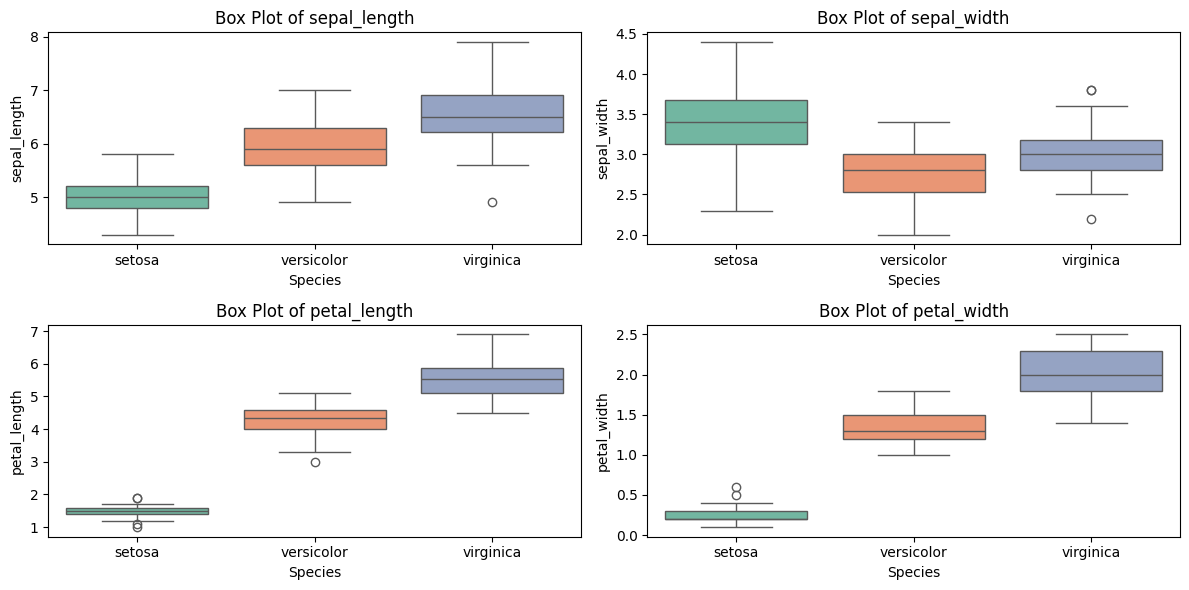

In [ ]:
# Create a boxplot for all the attributes with target variable
plt.figure(figsize=(12, 6))

attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=attribute, data=df, palette='Set2')

    plt.title(f'Box Plot of {attribute}')
    plt.xlabel('Species')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()



> **Data Preprocessing: Treating Outliers**



In [ ]:
# Replace outliers with median value for each attribute excluding the target variable
input_attributes = df.columns[:-1].tolist()
def replace_outliers_with_median(attribute):
    median = attribute.median()
    lower_limit = attribute.quantile(0.25) - 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    upper_limit = attribute.quantile(0.75) + 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))

    # Replace values outside the upper and lower limits with the median
    attribute = attribute.apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return attribute

# Apply the function to each attribute in the DataFrame
for attribute in input_attributes:
    df[attribute] = replace_outliers_with_median(df[attribute])

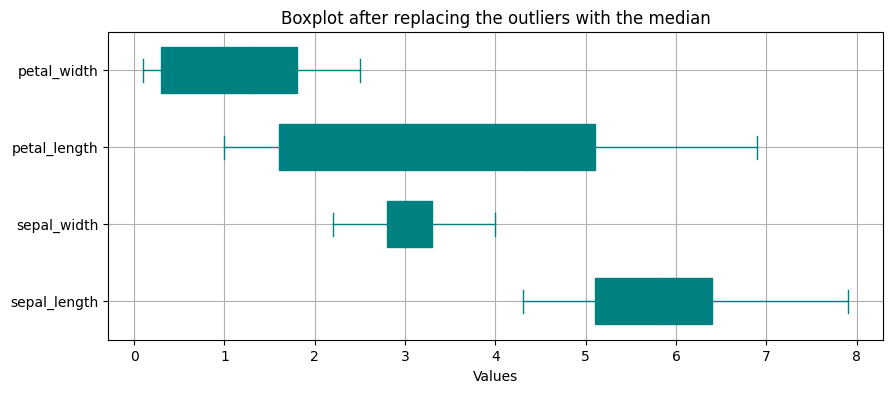

In [ ]:
# Box plots to verify if outliers were removed
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot after replacing the outliers with the median')
plt.xlabel('Values')
plt.show()

**Check Numeric and Categorical columns in the dataframe**

In [ ]:
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Object columns in the dataframe: ['species']


Check unique values in each column of the dataframe


In [ ]:
# Displaying the total number of unique values in each column
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in sepal_length column are: 35
No. of unique values in sepal_width column are: 19
No. of unique values in petal_length column are: 43
No. of unique values in petal_width column are: 22
No. of unique values in species column are: 3


In [ ]:
# Displaying the unique values in each column
unique_val=[]
print("Unique values in each column are - ")
print()
for col in df.columns:
    print(f'{col}: {df[col].unique()}')
    unique_val.append(col)
    print("-"*110)

Unique values in each column are - 

sepal_length: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
--------------------------------------------------------------------------------------------------------------
sepal_width: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  3.8 3.3 2.3 2.8 2.4 2.7 2.2 2.5
 2.6]
--------------------------------------------------------------------------------------------------------------
petal_length: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
--------------------------------------------------------------------------------------------------------------
petal_width: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
---------------------------------------------------------------------------------------

**Data Visualization**

1. Distribution of Species


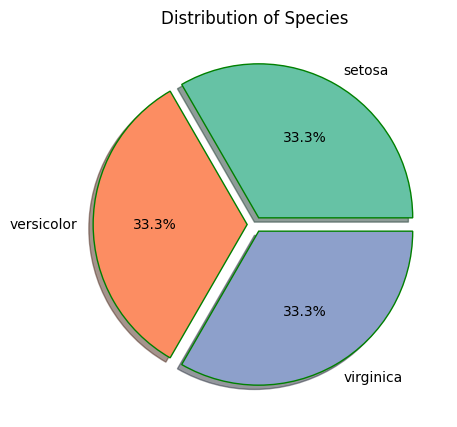

In [ ]:
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(df['species'].value_counts(),
        labels= df['species'].unique(),
        autopct='%1.1f%%', shadow=True,
        explode=(.05, .05, .05), wedgeprops=wp,
        colors = ['#66c2a5', '#fc8d62', '#8da0cb'], textprops=dict(color="black"))

ax.set_title("Distribution of Species")

plt.show()

2. Relationship between variables


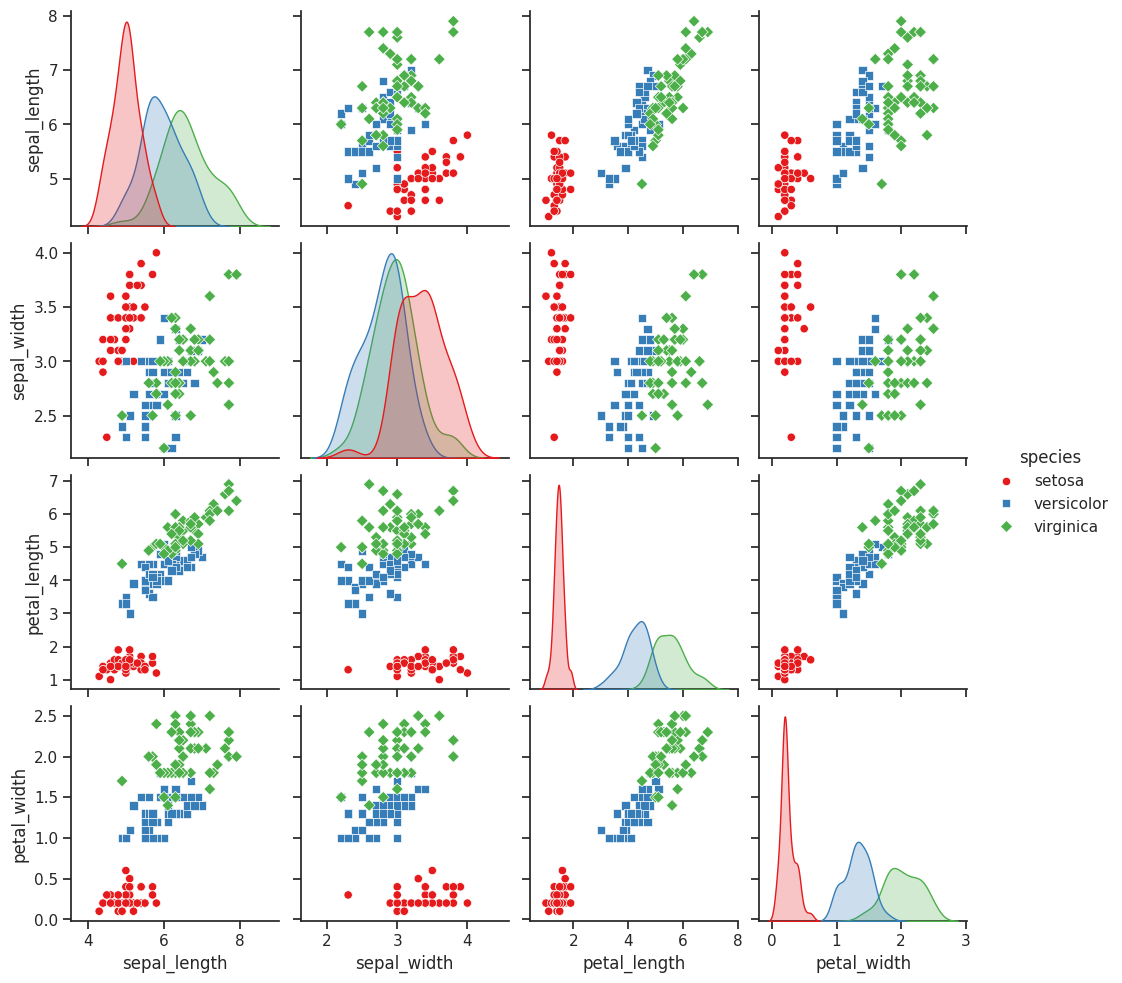

In [ ]:
# Pairplot to visualize relationships between features
sns.set(style="ticks")
custom_palette = sns.color_palette("Set1")[:3]
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], palette=custom_palette)
plt.show()

3. Distribution of data for the various columns using Histogram


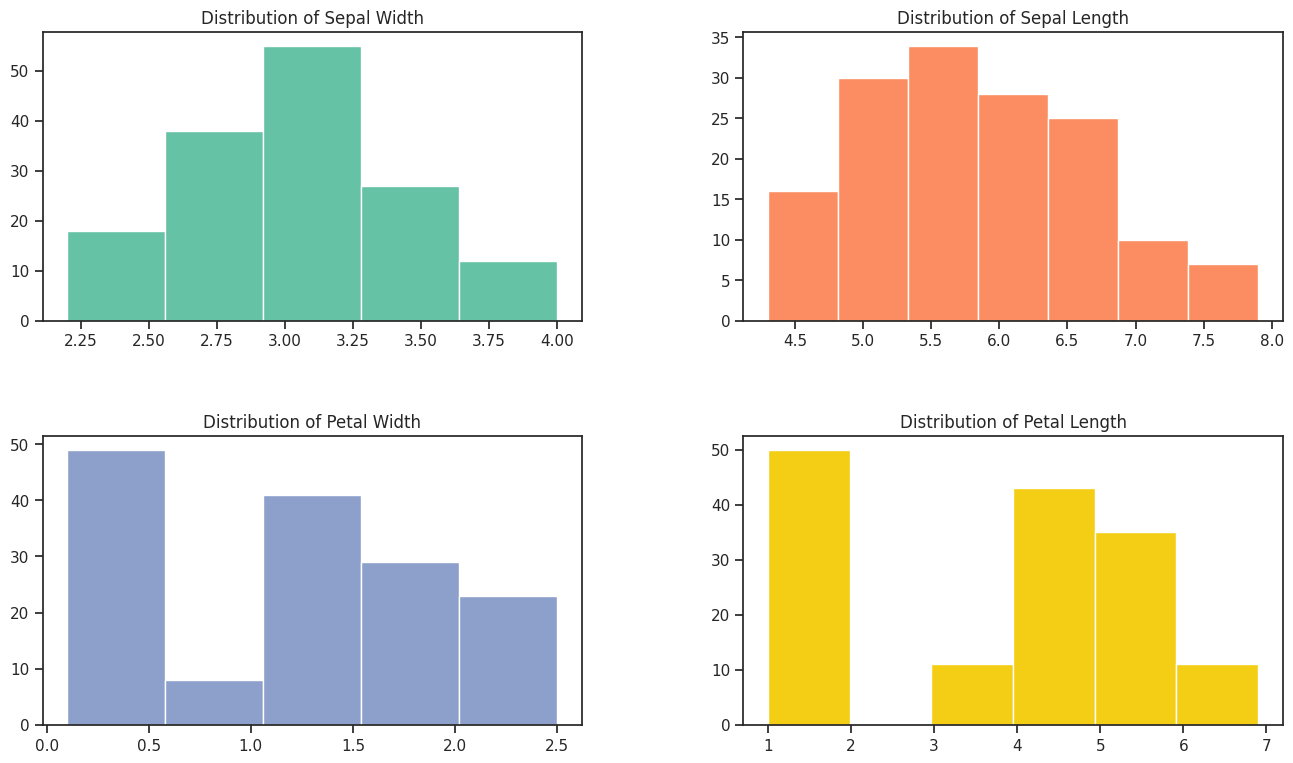

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal_width'], bins=5, color="#66c2a5");
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal_length'], bins=7,color="#fc8d62");
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal_width'], bins=5,color="#8da0cb");
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal_length'], bins=6,color="#F4CE14");

# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

4. Histogram to visualize relationships between variables


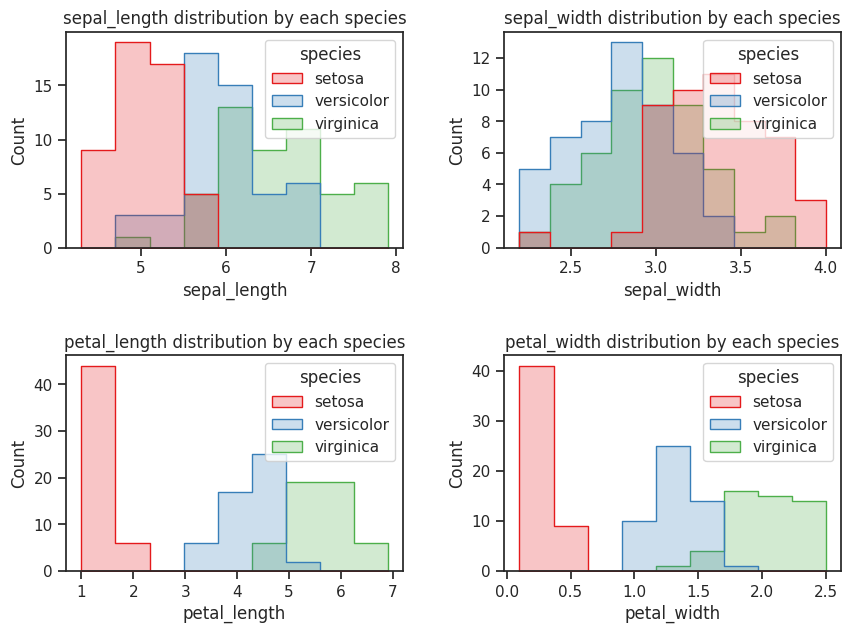

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 7))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=column, hue='species', element="step", common_norm=False, palette="Set1")
    plt.title(f'{column} distribution by each species')

# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

5. Histogram with a density plot to visualize relationships between variables


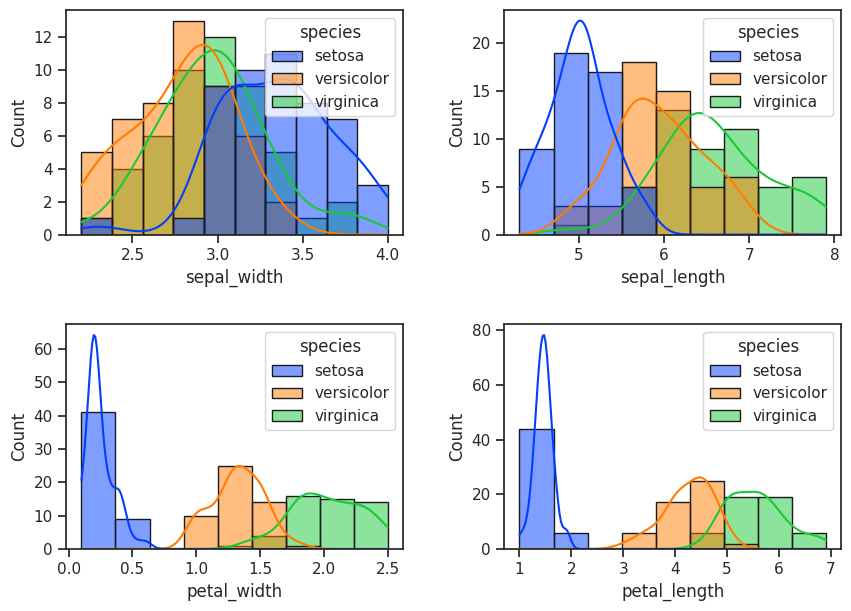

In [ ]:
# Plot histogram with a density plot
fig, axes = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(ax = axes[0,0],data=df,x ='sepal_width',hue='species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[0,1],data=df,x ='sepal_length',hue='species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,0],data=df,x ='petal_width',hue='species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,1],data=df,x ='petal_length',hue='species',kde=True,palette="bright",edgecolor='k')
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)

6. Swarm plots for each attribute


<ipython-input-26-f42d460bfdda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=column, data=df, linewidth=1, palette="Set1")
<ipython-input-26-f42d460bfdda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=column, data=df, linewidth=1, palette="Set1")
<ipython-input-26-f42d460bfdda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=column, data=df, linewidth=1, palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be pla

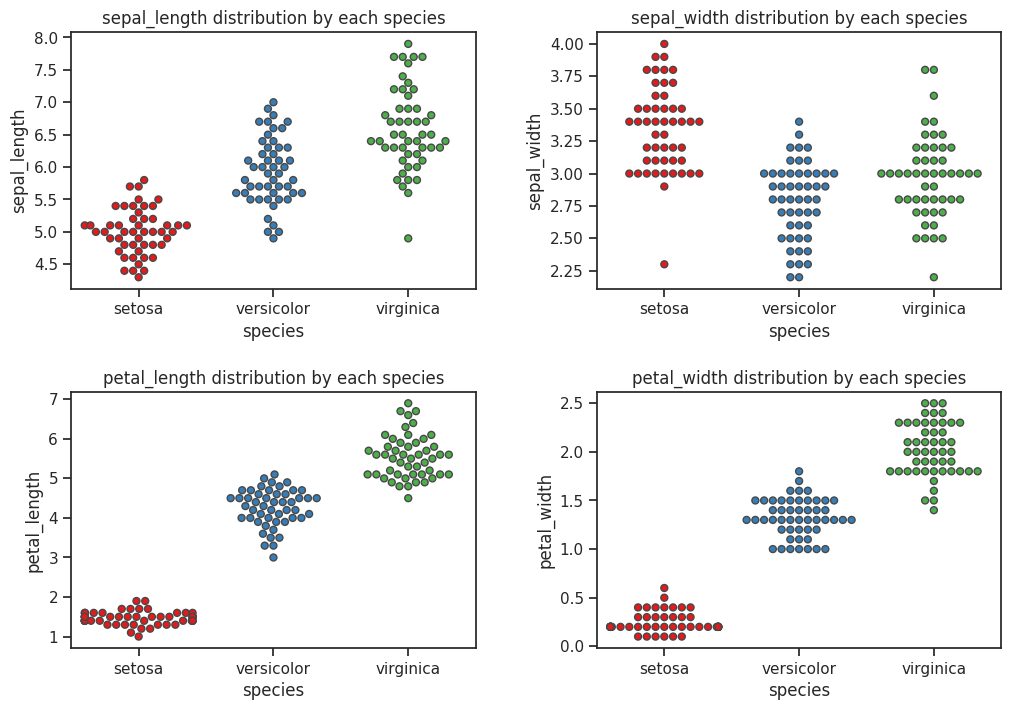

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='species', y=column, data=df, linewidth=1, palette="Set1")
    plt.title(f'{column} distribution by each species')

# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

7. Violin plot to visualize distribution and density by species


<ipython-input-27-e1012c3e4e7f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="petal_length", data=df, palette="Set1")
<ipython-input-27-e1012c3e4e7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="petal_width", data=df, palette="Set1")
<ipython-input-27-e1012c3e4e7f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="sepal_width", data=df, palette="Set1")
<ipython-input-27-e1012c3e4e7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

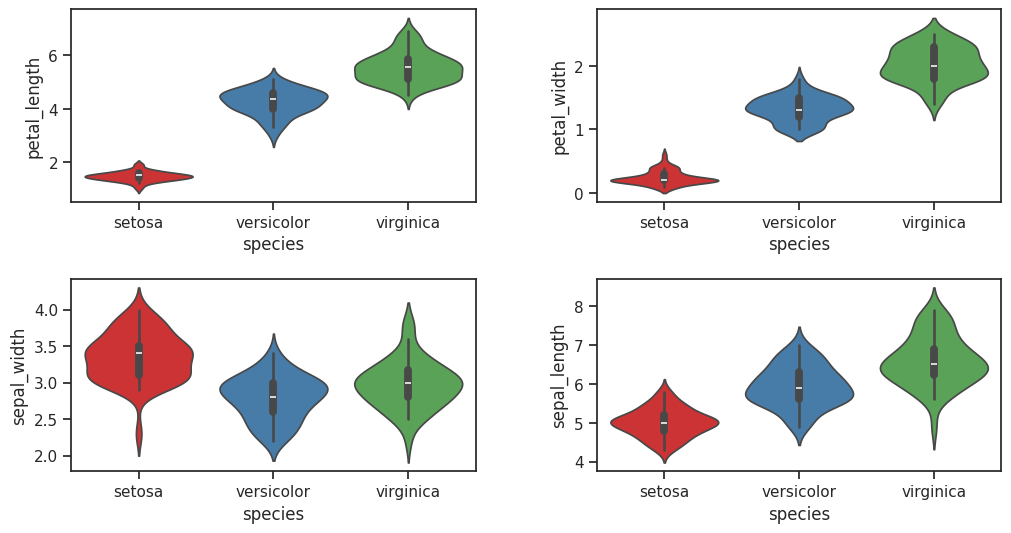

In [ ]:
# Violin plot to visualize distribution and density by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="petal_length", data=df, palette="Set1")
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="petal_width", data=df, palette="Set1")
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="sepal_width", data=df, palette="Set1")
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="sepal_length", data=df, palette="Set1")

# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

8. Generic plot for Sepal length vs width and Petal length vs width


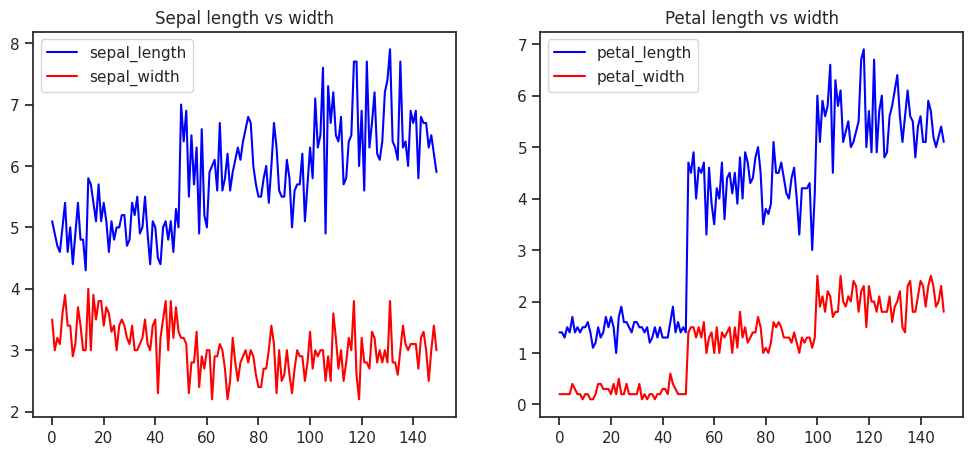

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(df['sepal_length'],color='blue')
ax[0].plot(df['sepal_width'],color='red')
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(df['petal_length'],color='blue')
ax[1].plot(df['petal_width'],color='red')
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

9. Visualise the correlation using a heatmap


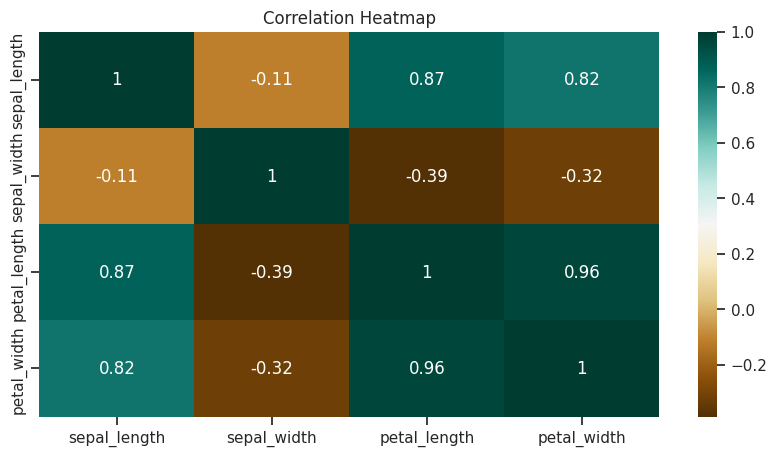

In [ ]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr(numeric_only = True)
ax = sns.heatmap(correlation_matrix,annot=True,cmap="BrBG");
ax.set_title("Correlation Heatmap")
plt.show()

**Feature Engineering**

In [ ]:
#Encoding on target variable
df["species"]=df["species"].replace({"setosa":0,"versicolor":1,"virginica":2})

In [ ]:
# Define X and y
X = df.drop(['species'], axis=1)
y = df['species']

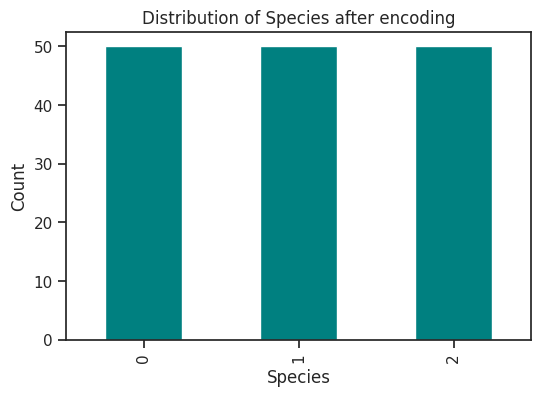

In [ ]:
#plot the encoded data
Species_encoded = y.value_counts()
plt.figure(figsize=(6, 4))
Species_encoded.plot(kind='bar', color='teal')
plt.title('Distribution of Species after encoding')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

**Splitting the Data into training and testing sets**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print shapes of X_train, y_train, X_test, y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


**Model Training and Model Evaluation**

In [ ]:
#Create a function a evaluate performance metrics
def Evaluate_Performance(model, Xtrain, Xtest, ytrain, ytest) :
    model.fit(Xtrain,ytrain)
    overall_score = cross_val_score(model, Xtrain,ytrain, cv=10)
    model_score = np.average(overall_score)
    ypredicted = model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(model.score(Xtrain, ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(ytest, ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(ytest, ypredicted , average=avg) * 100,2)}")

1. Logistic Regression Model


In [ ]:
#Building Logistic Regression model and evaluating the model's performance metrics
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train.ravel())
Logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression: ")
Evaluate_Performance(logistic_model, X_train, X_test, y_train, y_test)

Logistic Regression: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 95.45
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(46.24999999999999, 0.5, 'Actual outputs')

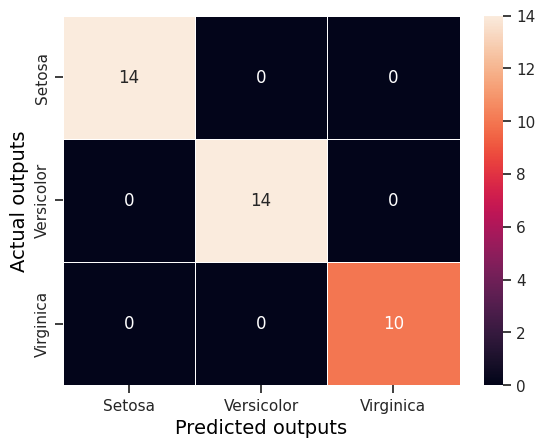

In [ ]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, Logistic_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

2. K-Nearest Neighbors Model


In [ ]:
KNN = KNeighborsClassifier()
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 9}

In [ ]:
K = 3
KNN_model = KNeighborsClassifier(K)
KNN_model.fit(X_train , y_train.ravel())
KNN_pred = KNN_model.predict(X_test)
print("K-Nearest Neighbors: ")
Evaluate_Performance(KNN_model, X_train, X_test, y_train, y_test)

K-Nearest Neighbors: 

 • Training Accuracy Score :  94.64
 • Cross Validation Score : 93.79
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(46.24999999999999, 0.5, 'Actual outputs')

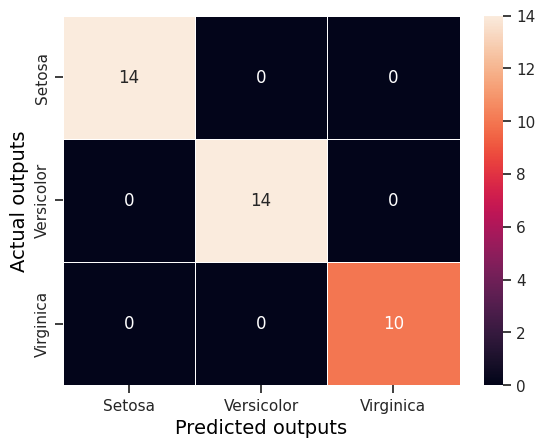

In [ ]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, KNN_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

3. Gaussian Naive Bayes Model


In [ ]:
GNB_model = GaussianNB()
GNB_model.fit(X_train , y_train.ravel())
GNB_pred = GNB_model.predict(X_test)
print("Gaussian Naive Bayes: ")
Evaluate_Performance(GNB_model, X_train, X_test, y_train, y_test)

Gaussian Naive Bayes: 

 • Training Accuracy Score :  93.75
 • Cross Validation Score : 93.71
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(46.24999999999999, 0.5, 'Actual outputs')

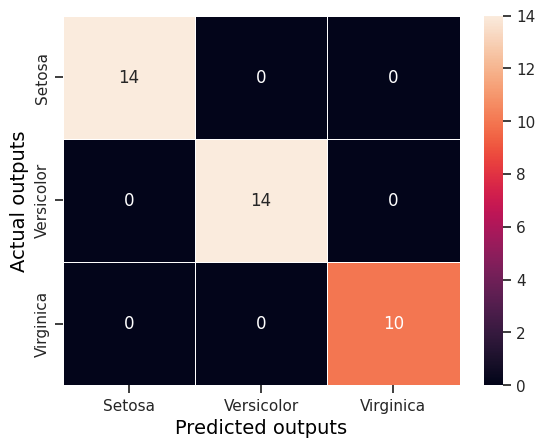

In [ ]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, GNB_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

4. Support Vector Machine Model


In [ ]:

SVM_model = SVC()
SVM_model.fit(X_train , y_train)
SVM_pred = SVM_model.predict(X_test)
print("Support Vector Machine: ")
Evaluate_Performance(SVM_model, X_train, X_test, y_train, y_test)

Support Vector Machine: 

 • Training Accuracy Score :  97.32
 • Cross Validation Score : 94.55
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(46.24999999999999, 0.5, 'Actual outputs')

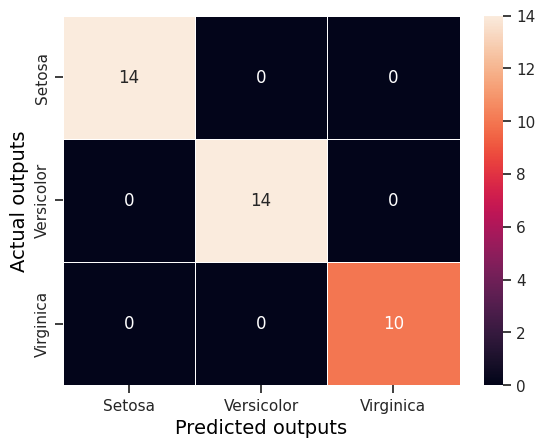

In [ ]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, SVM_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

5. Decision Tree Model


In [ ]:
DTree_model = DecisionTreeClassifier(max_depth = 3)
DTree_model.fit(X_train , y_train)
DTree_pred = DTree_model.predict(X_test)
print("Decision Tree: ")
Evaluate_Performance(DTree_model, X_train, X_test, y_train, y_test)

Decision Tree: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 91.89
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(46.24999999999999, 0.5, 'Actual outputs')

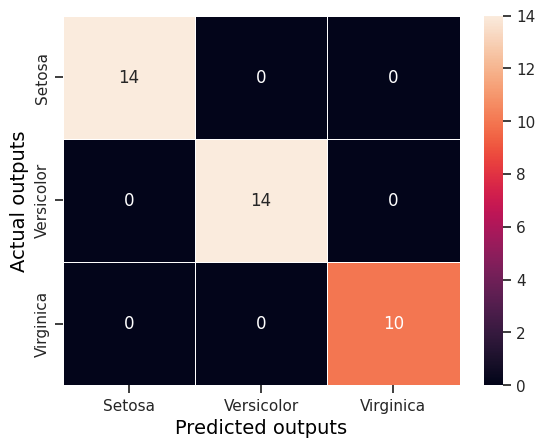

In [ ]:

# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, DTree_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

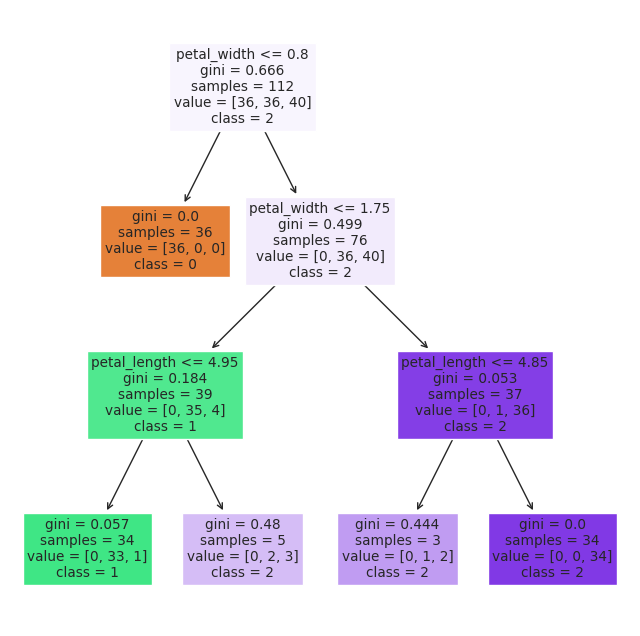

In [ ]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (DTree_model , feature_names = F , class_names = T , filled = True)

6. Random Forest Model


In [ ]:
RF_model = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF_model.fit(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print("Random Forest: ")
Evaluate_Performance(RF_model, X_train, X_test, y_train, y_test)

Random Forest: 

 • Training Accuracy Score :  95.54
 • Cross Validation Score : 91.89
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(46.24999999999999, 0.5, 'Actual outputs')

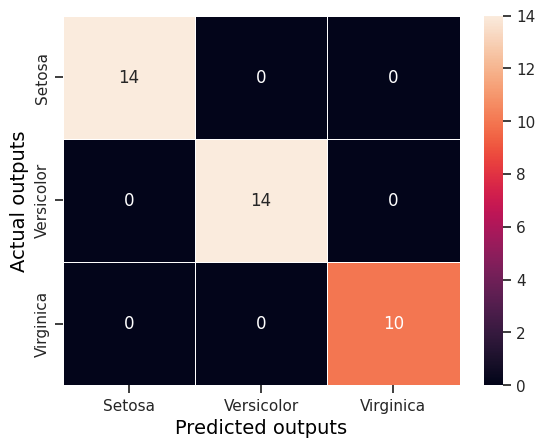

In [ ]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, RF_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

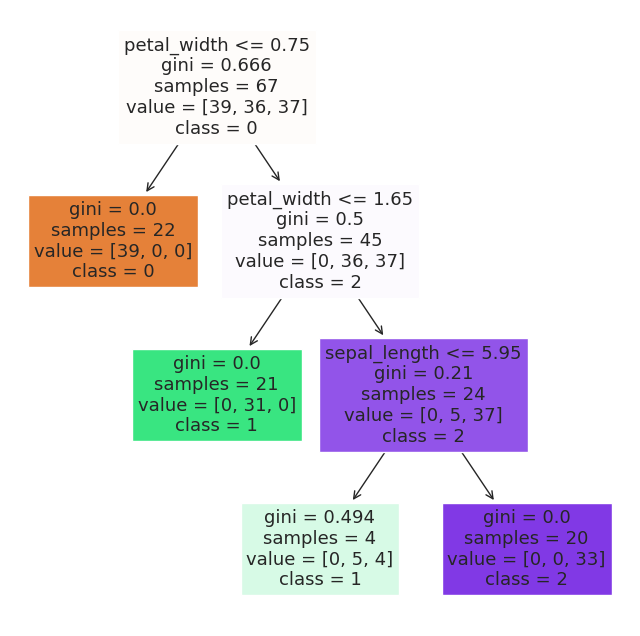

In [ ]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (RF_model.estimators_[5] , feature_names = F , class_names = T , filled = True)

Create Dataframe of all models performance metrics


In [ ]:
models = pd.DataFrame ({
    'Model' : ['Logistic Regression', ' K-Nearest Neighbors Model', 'Gaussian Naive Bayes', 'Support Vector Machine',
               'Decision Tree', 'Random Forest'] ,
    'Precision' : [precision_score(y_test, Logistic_pred, average='weighted') , precision_score(y_test, KNN_pred, average='weighted'),
                   precision_score(y_test, GNB_pred, average='weighted') , precision_score(y_test, SVM_pred, average='weighted'),
                   precision_score(y_test, DTree_pred, average='weighted') , precision_score(y_test, RF_pred, average='weighted')],
    'Recall' : [recall_score(y_test, Logistic_pred, average='weighted') , recall_score(y_test, KNN_pred, average='weighted'),
                recall_score(y_test, GNB_pred, average='weighted') , recall_score(y_test, SVM_pred, average='weighted'),
                recall_score(y_test, DTree_pred, average='weighted') , recall_score(y_test, RF_pred, average='weighted')],
    'F1-score' : [f1_score(y_test, Logistic_pred, average='weighted') , f1_score(y_test, KNN_pred, average='weighted'),
                  f1_score(y_test, GNB_pred, average='weighted') , f1_score(y_test, SVM_pred, average='weighted'),
                  f1_score(y_test, DTree_pred, average='weighted') , f1_score(y_test, RF_pred, average='weighted')],
    'Accuracy' : [accuracy_score(y_test, Logistic_pred) , accuracy_score(y_test, KNN_pred) , accuracy_score(y_test, GNB_pred),
                  accuracy_score(y_test, SVM_pred) , accuracy_score(y_test, DTree_pred) , accuracy_score(y_test, RF_pred)]})

models = models.sort_values(by='Accuracy', ascending=False)
print(tabulate(models, headers='keys', tablefmt='github',showindex=False))

| Model                     |   Precision |   Recall |   F1-score |   Accuracy |
|---------------------------|-------------|----------|------------|------------|
| Logistic Regression       |           1 |        1 |          1 |          1 |
| K-Nearest Neighbors Model |           1 |        1 |          1 |          1 |
| Gaussian Naive Bayes      |           1 |        1 |          1 |          1 |
| Support Vector Machine    |           1 |        1 |          1 |          1 |
| Decision Tree             |           1 |        1 |          1 |          1 |
| Random Forest             |           1 |        1 |          1 |          1 |


Bar plot of all Models Accuracy Comparision


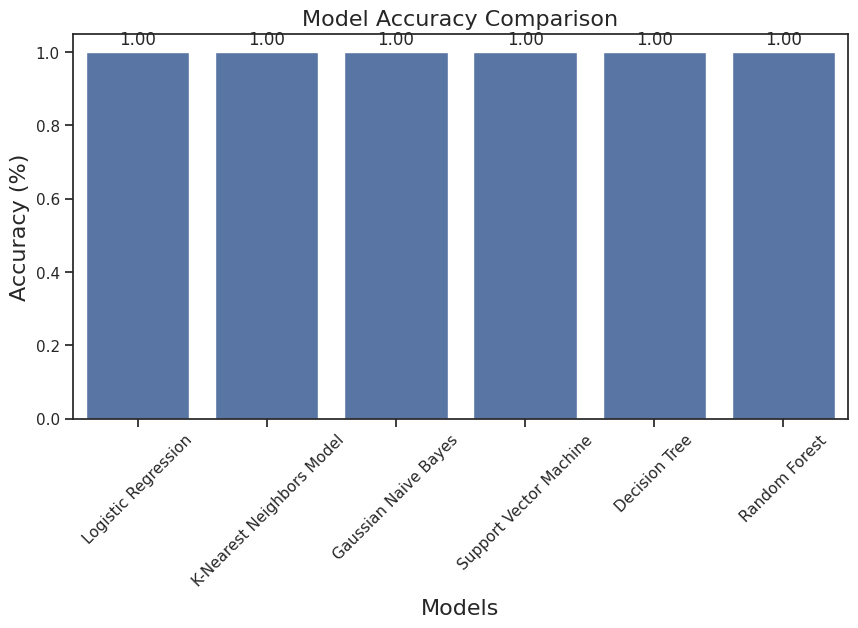

In [ ]:
plt.figure(figsize=(10, 5))
plot=sns.barplot(x='Model',y='Accuracy',data=models)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title("Model Accuracy Comparison",fontsize=16)
plt.xlabel("Models",fontsize=16)
plt.ylabel("Accuracy (%)",fontsize=16)
plt.xticks(rotation=45)
plt.show()

Model Testing: The Inference Pipeline


In [ ]:
# Checking a sample of predictor value of measurements from the the model which is trained
X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
# Checking the species according to above predictor variables
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: species, dtype: int64

In [ ]:
# Generate unseen data accordingly with inputs
user_values=np.array([5.9,3.0,5.1,1.8]).reshape(1,-1)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
user_values_df = pd.DataFrame(user_values, columns=feature_names)

# Predict the species using KNN model
predict = KNN_model.predict(user_values_df)

# Display the predicted species
print(f'The species is: {predict}')

The species is: [2]


Generating the output file with predicted results


In [ ]:
#decoding the species
df["species"]=df["species"].replace({0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#storing the predicted results in a dataframe
pred_result = pd.DataFrame(KNN_model.predict(X))
pred_result = pred_result.rename(columns = {0 : "Predicted Species"})
pred_result

,Predicted Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
#decoding the species for predicted results
Species_decoded = {0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}
pred_result['predicted_species'] = pred_result['Predicted Species'].map(Species_decoded)
pred_result

,Predicted Species,predicted_species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [ ]:
#Generating the output file with predicted species
final_model = pd.concat([df, pred_result['predicted_species']], axis = 1)
final_model

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica
